In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [ ]:
local_zip = '/content/drive/MyDrive/archive (4).zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

base_dir = '/content'
train_dir = os.path.join(base_dir, 'normal')
validation_dir = os.path.join(base_dir, 'normal')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'Original')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'Tampered')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'Original')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'Tampered')

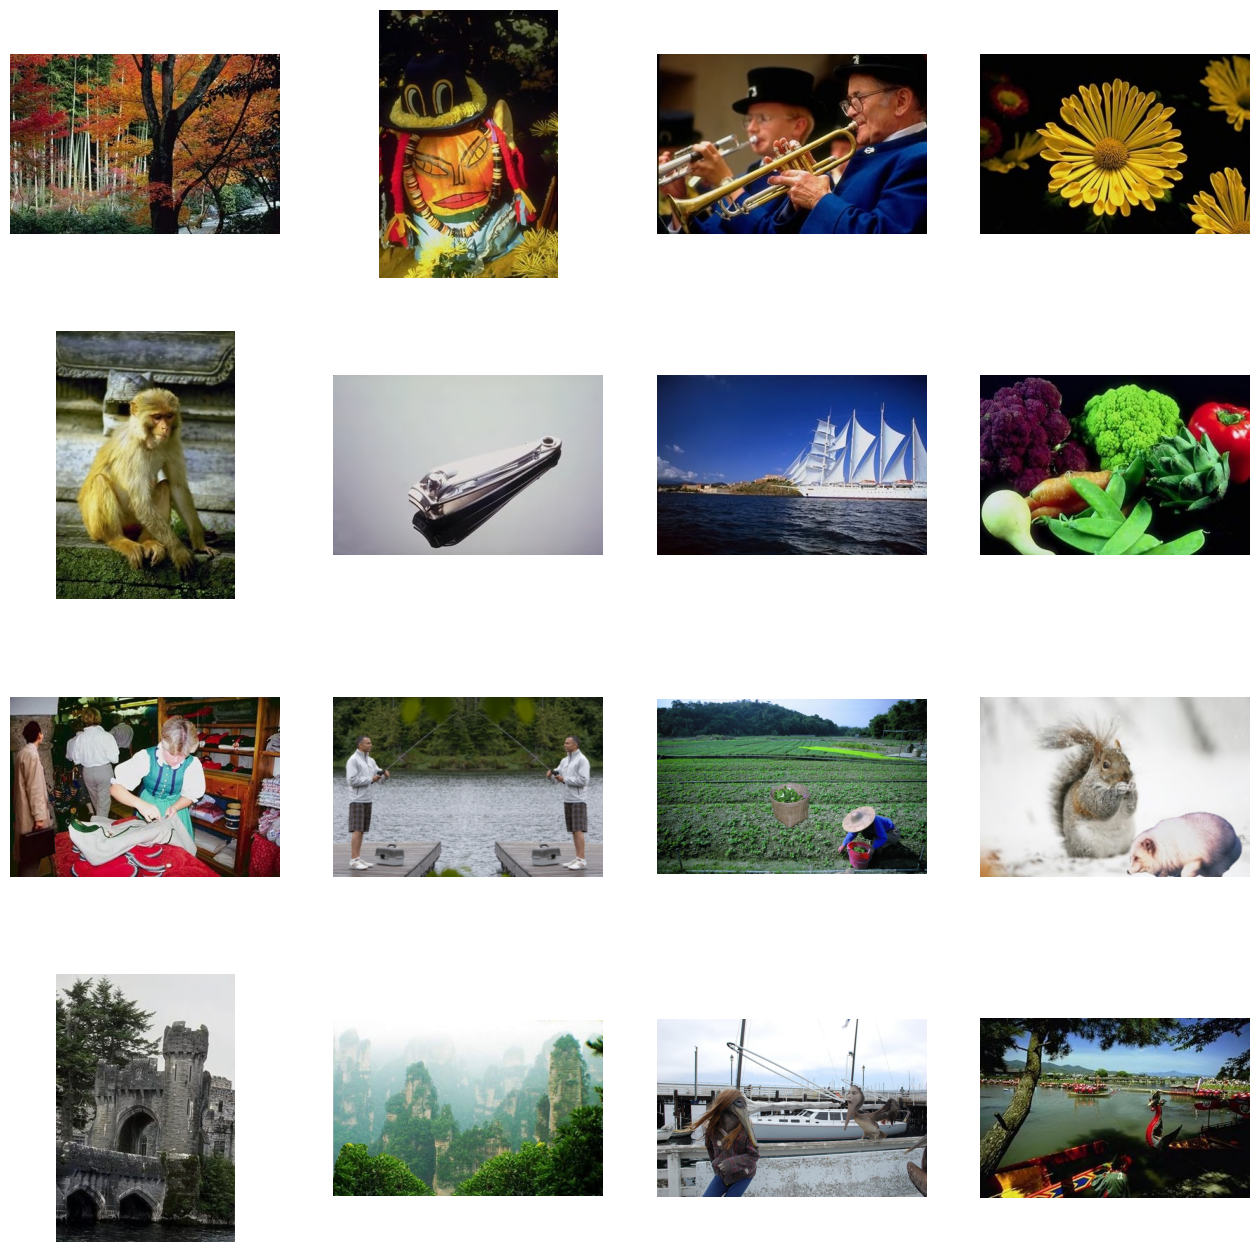

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )


next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)

In [ ]:
!pip install -U efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
import efficientnet.keras as efn

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory( validation_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 14982 images belonging to 2 classes.
Found 14982 images belonging to 2 classes.


In [ ]:
base_model = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

16804768/16804768 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Dropout
from keras import optimizers
from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop as legacy_RMSprop

In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
predictions = Dense(1, activation="sigmoid")(x)
model_final = Model(inputs = base_model.input, outputs = predictions)

In [ ]:
model_final.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
eff_history = model_final.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 30)

<ipython-input-14-615484dd2903>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  eff_history = model_final.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 30)


Epoch 1/30
100/100 [==============================] - 96s 970ms/step - loss: 0.8932 - accuracy: 0.6080 - val_loss: 0.9536 - val_accuracy: 0.6763
Epoch 2/30
100/100 [==============================] - 96s 967ms/step - loss: 0.8890 - accuracy: 0.6100 - val_loss: 0.8579 - val_accuracy: 0.6723
Epoch 3/30
100/100 [==============================] - 96s 963ms/step - loss: 0.8866 - accuracy: 0.6045 - val_loss: 0.8916 - val_accuracy: 0.6589
Epoch 4/30
100/100 [==============================] - 99s 998ms/step - loss: 0.8448 - accuracy: 0.6130 - val_loss: 0.8771 - val_accuracy: 0.6678
Epoch 5/30
100/100 [==============================] - 98s 985ms/step - loss: 0.8319 - accuracy: 0.6085 - val_loss: 0.7467 - val_accuracy: 0.6746
Epoch 6/30
100/100 [==============================] - 95s 955ms/step - loss: 0.7525 - accuracy: 0.6295 - val_loss: 0.8024 - val_accuracy: 0.6799
Epoch 7/30
100/100 [==============================] - 96s 964ms/step - loss: 0.7484 - accuracy: 0.6370 - val_loss: 0.7773 - val_ac

KeyboardInterrupt: 

In [ ]:
from google.colab import files
files.download('/content/sample_data/README.md')